# Dog Breed Prediction
---
**What does this Project do?**
- This project builds up a machine to identify the breed of a dog in a supplied image by building a Convolutional Neural Network with Keras and TensorFlow

This is a supervised learning problem, specifically a multiclass classification problem.

**What is the Business Impact & Purpose of this Project?**
- The problem this project tries to solve is a supervised machine learning problem - multiclass classification problem
- On a narrow basis, organizations related to dog can use this to save manwork time when it comes to identifying the breed
- Theoretically, other similar multiclass classification problem with images could be apply this approach 

**How to Build Up this Project?**
1. Download the dataset from Kaggle
2. Basic data preprocessing for the labels
3. Convert the images into array and normalize them
4. Split the training set and testing set
5. Build up the model network architecture and feed the data into the model
6. Check the accuracy plot and evaluate the model accuracy based on train-test-split
7. Build functions to manually check the dog image, original and predicted breed.

---

## Download the Dataset from Kaggle
- Download your kaggle token `kaggle.json`file and place in the repository, same path as this notebook

In [1]:
# # Install the Kaggle API client.
# !pip install -q kaggle

# # The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !mkdir dog_dataset
# %cd dog_dataset
# # Searching for dataset
# !kaggle datasets list -s dogbreedidfromcomp

# # Downloading dataset and coming out of directory
# !kaggle datasets download catherinehorng/dogbreedidfromcomp
# %cd ..

# # Unzipping downloaded file and removing unusable file
# !unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
# !rm dog_dataset/dogbreedidfromcomp.zip
# !rm dog_dataset/sample_submission.csv

## Environment Setup

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

## Data Preprocessing

In [3]:
# Check the dataset labels
labels_all = pd.read_csv("dog_dataset/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
# Find out how many kinds of breed and a brief overview of the entire datasets
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
print(f"There are a total of {len(breed_counts)} breeds\n")
print(breed_counts)

There are a total of 120 breeds

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


> This demo only tries to predict three kinds of dog breeds due to large amount of data and limited computing power

In [5]:
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog
...,...,...,...
352,10154,fe3e760d763e186541e18f303cd7caca,bernese_mountain_dog
353,10158,fe50bac6c389d137ea01c9cfc7346ca8,scottish_deerhound
354,10178,fef5d4cdaf50cf159102e803c7d6aa9c,bernese_mountain_dog
355,10200,ff7d9c08091acc3b18b869951feeb013,maltese_dog


In [6]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 357/357 [00:00<00:00, 618.46it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


> The demo works with the classification dataset first and need to one hot encode the target value i.e. the classes. After that we will read images and convert them into numpy array and finally normalizing the array.

In [7]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

2022-05-10 23:12:12.539024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 23:12:12.539112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxP

> Here we create a network architecture for the model with different types of layers according to their features namely 

> - `Conv_2d` (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor)
> - `max_pooling2d` (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output)
> - `Dense` (Dense layer produce the output as the dot product of input and kernel).

In [8]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

> After defining the network architecture we split the test and train data then dividing train data in train and validation data.

In [9]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

2022-05-10 23:12:12.727683: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-05-10 23:12:12.938683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 4.9132 - accuracy: 0.3750

2022-05-10 23:12:14.043988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 704ms/step - loss: 4.9132 - accuracy: 0.3750 - val_loss: 4.9092 - val_accuracy: 0.2769
Epoch 2/100
2/2 [==============================] - 1s 486ms/step - loss: 4.8856 - accuracy: 0.3750 - val_loss: 4.8875 - val_accuracy: 0.2769
Epoch 3/100
2/2 [==============================] - 1s 513ms/step - loss: 4.8599 - accuracy: 0.3750 - val_loss: 4.8655 - val_accuracy: 0.2769
Epoch 4/100
2/2 [==============================] - 1s 528ms/step - loss: 4.8339 - accuracy: 0.3750 - val_loss: 4.8406 - val_accuracy: 0.2769
Epoch 5/100
2/2 [==============================] - 1s 493ms/step - loss: 4.8084 - accuracy: 0.3750 - val_loss: 4.8150 - val_accuracy: 0.2769
Epoch 6/100
2/2 [==============================] - 1s 481ms/step - loss: 4.7827 - accuracy: 0.3750 - val_loss: 4.7883 - val_accuracy: 0.2769
Epoch 7/100
2/2 [==============================] - 1s 487ms/step - loss: 4.7574 - accuracy: 0.3750 - val_loss: 4.7621 - val_accuracy: 0.2769
Epoch 8/100
2/2 [========

> Here the X_train and Y_train data are feeded into the model and create the network with each epoch

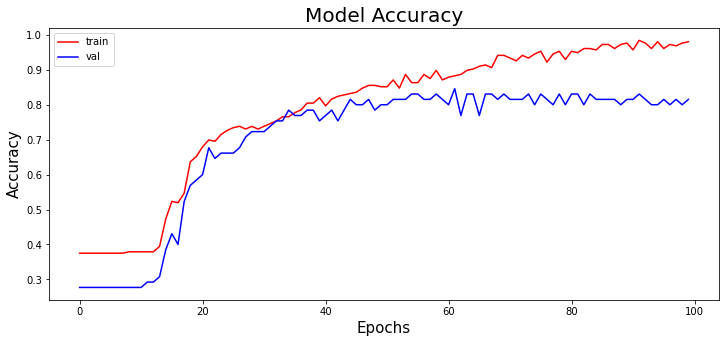

In [10]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'val'])

plt.show()

In [11]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 26ms/step - loss: 3.2295 - accuracy: 0.8056
Accuracy over the test set: 
  80.56 %


2022-05-10 23:13:44.610861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
def plot_dog_image_breed(num):
    # Plotting image to compare
    plt.imshow(X_test[num,:,:,:])
    plt.show()

    # Finding max value from predition list and comaparing original value vs predicted
    print("Originally : ",labels['breed'][np.argmax(Y_test[num])])
    print("Predicted : ",labels['breed'][np.argmax(Y_pred[num])])

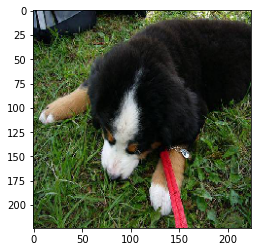

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [13]:
plot_dog_image_breed(1)

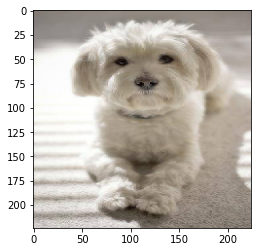

Originally :  maltese_dog
Predicted :  maltese_dog


In [14]:
plot_dog_image_breed(15)

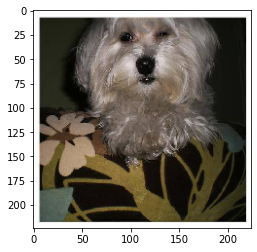

Originally :  maltese_dog
Predicted :  scottish_deerhound


In [15]:
plot_dog_image_breed(26)

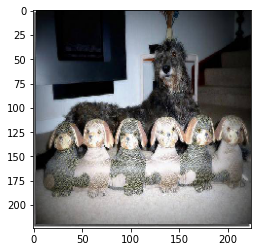

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [16]:
plot_dog_image_breed(30)

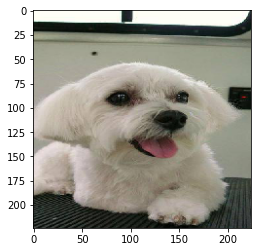

Originally :  maltese_dog
Predicted :  maltese_dog


In [18]:
plot_dog_image_breed(4)

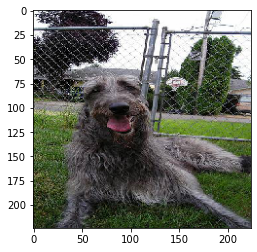

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [19]:
plot_dog_image_breed(19)

In [20]:
# Save the model and can be used in building Flask apps
model.save("dog_breed.h5")